              precision    recall  f1-score   support

           0       0.88      0.88      0.88       145
           1       0.89      0.88      0.89       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

AUC: 0.883315


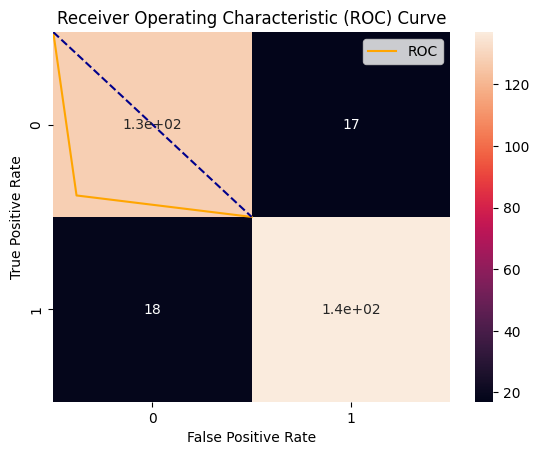

F Score: 0.886731
AUC: 0.620441


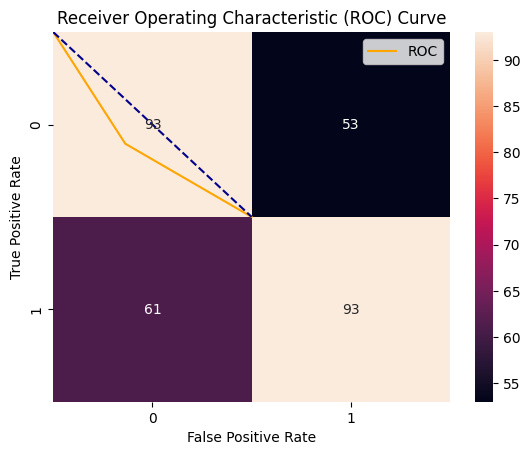

F Score: 0.620000
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       146
           1       0.64      0.60      0.62       154

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



In [5]:
## IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, classification_report
# f score 
from sklearn.metrics import f1_score


## CREATE DUMMY DATA 

data_X, class_label = make_classification(n_samples = 1000, n_features = 5, n_classes = 2) # generates a random n-class classification problem
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3) # creates training and test sets


## CREATE DESCISION TREE

model = DecisionTreeClassifier() 
model.fit(trainX, trainy)


## CREATE NEW PREDICTIONS

predictions = model.predict_proba(testX)[:, 1] 


## CALCULATE ACCURACY
accuracy = accuracy_score(testy , predictions)
print(classification_report(testy, predictions))

## CREATE CONFUSION MATRIX
CM = confusion_matrix(testy , predictions)
sns.heatmap(pd.DataFrame(CM), annot=True)

TN, FP, FN, TP = CM.ravel() # students do not need to do this, but good for you to have if they ask


## CALCUATE PRECISION, RECALL AND SPECIFICITY
precision = TP/(TP+FP)
recall = TP/(TP+FN) 
specificity = TN/(TN+FP)


## CALCULATE AUC

auc = roc_auc_score(testy, predictions)
print('AUC: %f' %auc)


## PLOT ROC CURVE

fpr, tpr = roc_curve(testy, predictions)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## CALCULATE F SCORE 

fscore = f1_score(testy, predictions)
print('F Score: %f' %fscore)





## CREATE ANOTHER MODEL AND COMPARE THE TWO 

data_X_mod2, class_label_mod2 = make_classification(n_samples = 1000, n_features = 5, n_classes = 2, flip_y = 0.5) 
trainX_mod2, testX_mod2, trainy_mod2, testy_mod2 = train_test_split(data_X_mod2, class_label_mod2, test_size=0.3)

model_mod2 = DecisionTreeClassifier() 
model_mod2.fit(trainX_mod2, trainy_mod2)

predictions_mod2 = model_mod2.predict_proba(testX_mod2)[:, 1] 

accuracy_score(testy_mod2,predictions_mod2)

CM_mod2 = confusion_matrix(testy_mod2 , predictions_mod2)
sns.heatmap(pd.DataFrame(CM_mod2), annot=True)

auc_mod2 = roc_auc_score(testy_mod2, predictions_mod2)
print('AUC: %f' %auc_mod2)

fpr_mod2, tpr_mod2 = roc_curve(testy_mod2, predictions_mod2)[0:2]
plt.plot(fpr_mod2, tpr_mod2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

fscore_mod2 = f1_score(testy_mod2, predictions_mod2)
print('F Score: %f' %fscore_mod2)
print(classification_report(testy_mod2, predictions_mod2))